In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import os 

work_dir = os.path.dirname(os.getcwd())
df_dir = os.path.join(work_dir, 'df')
output_dir = os.path.join(work_dir, 'output')

In [13]:
# Data Loading
df_llm = pd.read_csv(os.path.join(output_dir, 'electoral_rolls_parsed_by_llm_output.csv'), header='infer', sep=';', encoding='utf-8')
df_regex = pd.read_csv(os.path.join(output_dir, 'electoral_rolls_output.csv'), header='infer', sep=';', encoding='utf-8')

print("df llm>> \n", df_llm.head())
print("df llm shape>", df_llm.shape)
print("df regex> \n", df_regex.head())
print("df regex shape>", df_regex.shape)


df llm>> 
      id    voter_id                   name house_number   age  gender  \
0  20.0  TNH3552262  Jtender Kumar Singh K           46  66.0    MALE   
1   8.0  TNH3421906            Aslam Uddin           18  28.0    MALE   
2  28.0  TNH3421898  Romij Uddin Choudhary           18  32.0    MALE   
3   NaN  TNH2625077                 Suma B         17/B  34.0  FEMALE   
4   NaN  TNH2625085             Sharadamma         17 B  55.0  FEMALE   

  parent_or_spouse_name_only  
0             Rajkumar Singh  
1               Bodrul Hoque  
2         Junab Ali Choudary  
3       Late Vishnu Bahaddur  
4                Late Vishnu  
df llm shape> (780, 7)
df regex> 
    id    voter_id                   name house_number  age  gender  \
0  20  TNH3552262  Jtender Kumar Singh K           46   66    MALE   
1   8  TNH3421906            Aslam Uddin           18   28    MALE   
2  28  TNH3421898  Romij Uddin Choudhary           18   32    MALE   
3  77  TNH2625077                 Suma B         

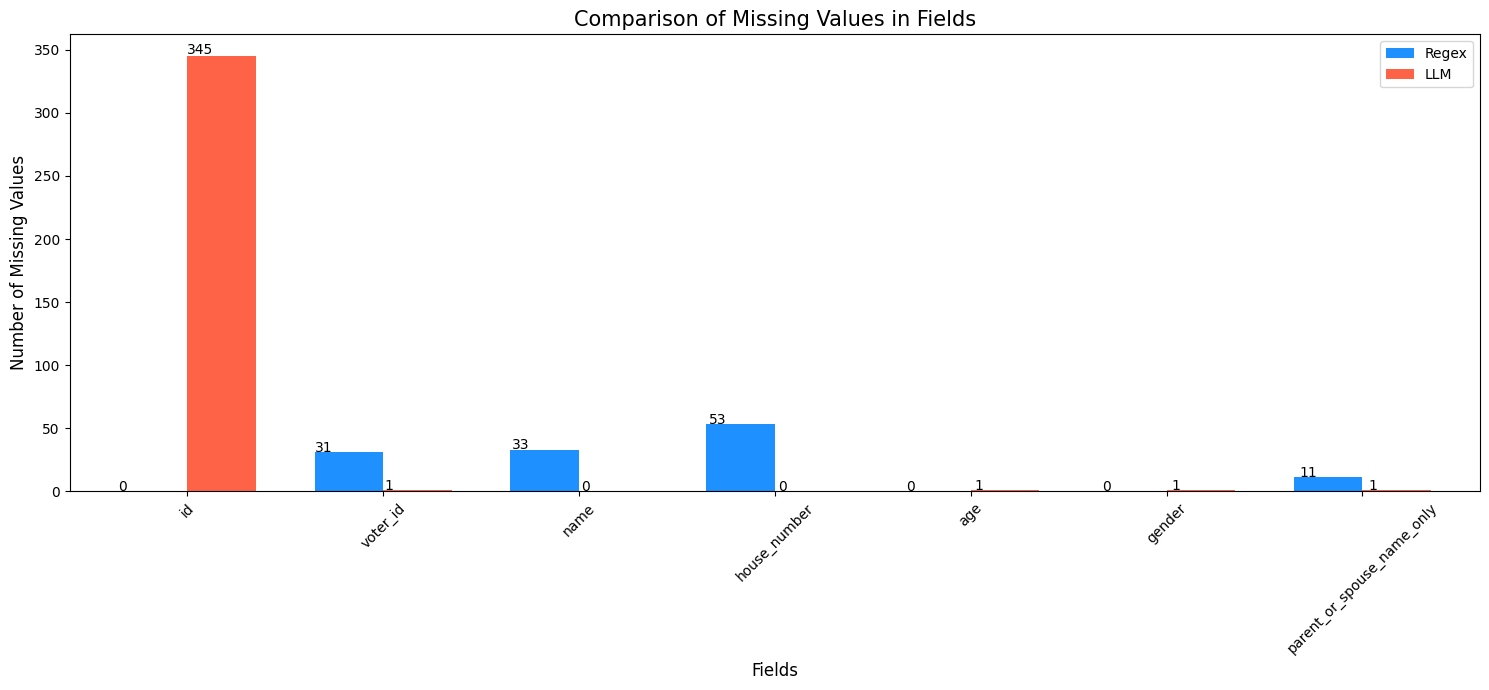

In [20]:
# Check for missing data in important fields
missing_data_regex = df_regex.isnull().sum()
missing_data_llm = df_llm.isnull().sum()

# Prepare data for visualization
missing_counts = pd.DataFrame({'Regex': missing_data_regex, 'LLM': missing_data_llm})
missing_counts = missing_counts.fillna(0)  # ensuring there are no NaN values

# Creating the bar chart
ax = missing_counts.plot(kind='bar', figsize=(15, 7), width=0.7, color=['dodgerblue', 'tomato'], rot=45)

# Setting labels and title
ax.set_title('Comparison of Missing Values in Fields', fontsize=15)
ax.set_xlabel('Fields', fontsize=12)
ax.set_ylabel('Number of Missing Values', fontsize=12)
ax.legend(["Regex", "LLM"])

# Annotating the bar chart with exact values
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.tight_layout()
plt.show()


# Summary 
The data cleaning revealed some missing values in both datasets. Here's a summary:

Regex-parsed data:

voter_id: 31 missing ( Improperly labelled)
name: 33 missing
house_number: 53 missing
parent_or_spouse_name_only: 11 missing


LLM-parsed data:
id: 345 missing Not properly extracted from OCR
voter_id: 1 missing
age: 1 missing
gender: 1 missing
parent_or_spouse_name_only: 1 missing


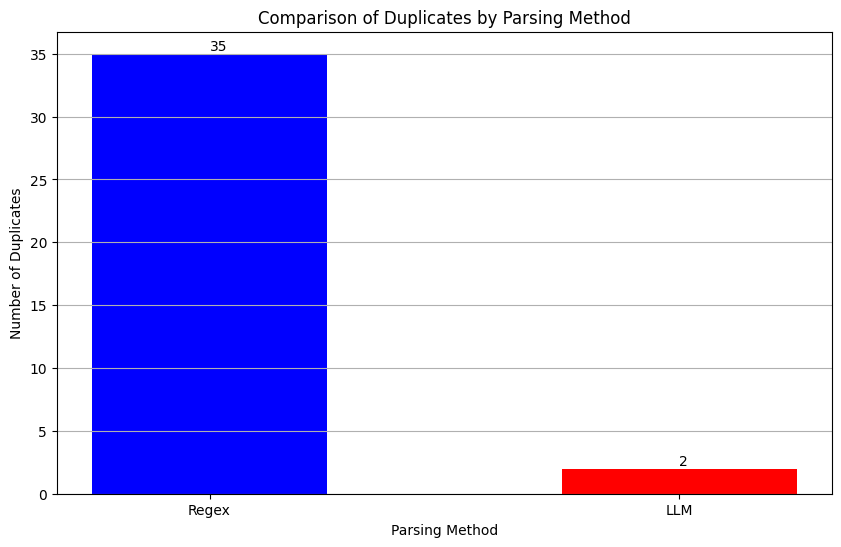

In [38]:
# Analyzing the duplicates by voter_ids as voter ids are unique

# Identifying duplicates based on 'voter_id' in both datasets
duplicates_regex = df_regex[df_regex.duplicated(subset=['voter_id'], keep=False)]
duplicates_llm = df_llm[df_llm.duplicated(subset=['voter_id'], keep=False)]

# Counting the number of duplicates
count_duplicates_regex = len(duplicates_regex)
count_duplicates_llm = len(duplicates_llm)

# Data preparation for visualization
duplicate_counts = {
    'Method': ['Regex', 'LLM'],
    'Duplicate Counts': [count_duplicates_regex, count_duplicates_llm]
}

duplicate_df = pd.DataFrame(duplicate_counts)

# Displaying the count before visualizing
count_duplicates_regex, count_duplicates_llm, duplicate_df

# Creating a bar chart for side-by-side comparison of duplicates
fig, ax = plt.subplots(figsize=(10, 6))

# Defining the bar positions and width
positions = range(len(duplicate_counts['Method']))
width = 0.5

# Creating the bar chart
bars = plt.bar(positions, duplicate_counts['Duplicate Counts'], width, align='center', color=['blue', 'red'])

# Adding data labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # va: vertical alignment

# Enhancing the chart for better readability
plt.xlabel('Parsing Method')
plt.ylabel('Number of Duplicates')
plt.title('Comparison of Duplicates by Parsing Method')
plt.xticks(positions, duplicate_counts['Method'])  # Set labels
plt.grid(axis='y')

plt.show()

We observe a significant difference between the two methods:

The Regex method resulted in a higher number of duplicates (35 instances), suggesting possible redundancies in data extraction or issues in how duplicates are handled during parsing.
Conversely, the LLM method shows a substantially lower number of duplicates (2 instances), indicating a more effective parsing. 

In [28]:
# Handling missing values by deleting certain records
essential_fields = ["voter_id", "name", "gender"]
data_regex_clean = df_regex.dropna(subset=essential_fields)
data_llm_clean = df_llm.dropna(subset=essential_fields)

data_llm_clean = data_llm_clean.drop_duplicates(subset=['voter_id'], keep='first')
data_regex_clean = data_regex_clean.drop_duplicates(subset=['voter_id'], keep='first')
# Number of records retained after cleaning
num_records_regex = len(data_regex_clean)
num_records_llm = len(data_llm_clean)

(num_records_regex, num_records_llm)

(714, 777)

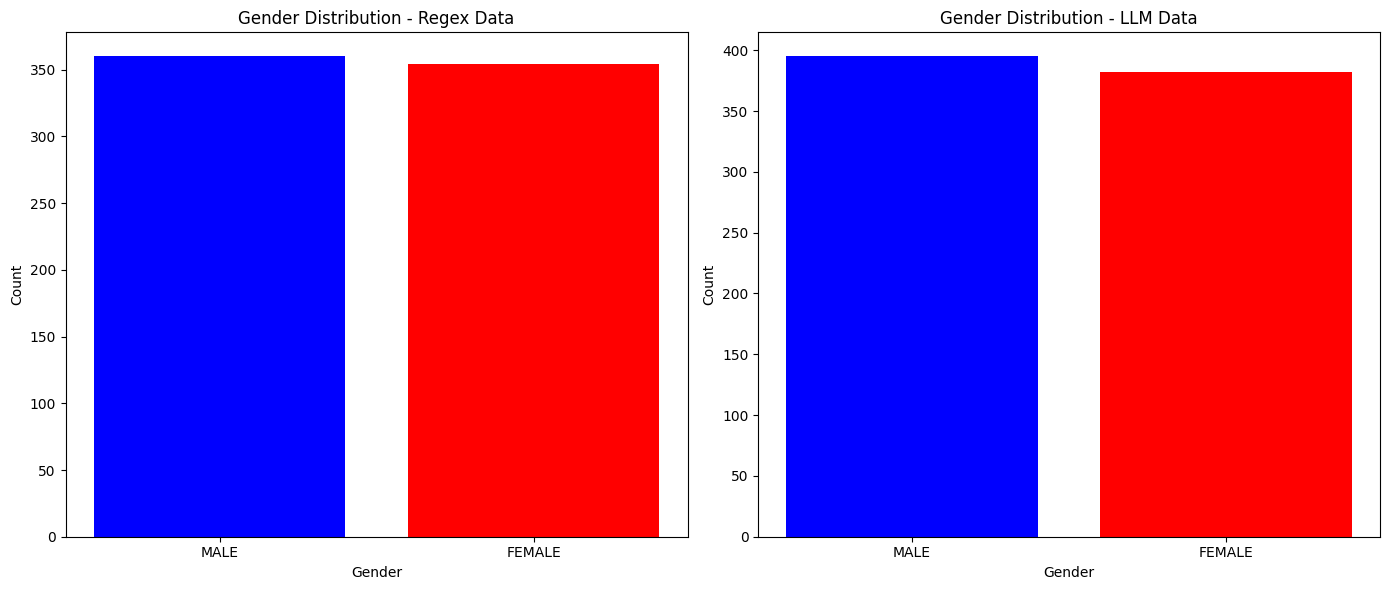

(gender
 MALE      360
 FEMALE    354
 Name: count, dtype: int64,
 gender
 MALE      395
 FEMALE    382
 Name: count, dtype: int64)

In [29]:
# Analyzing the distribution of gender both datasets

import matplotlib.pyplot as plt

# Gender distribution in both datasets
gender_dist_regex = data_regex_clean['gender'].value_counts()
gender_dist_llm = data_llm_clean['gender'].value_counts()

# Creating a bar chart for gender distribution comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for regex data
ax[0].bar(gender_dist_regex.index, gender_dist_regex.values, color=['blue', 'red'])
ax[0].set_title('Gender Distribution - Regex Data')
ax[0].set_xlabel('Gender')
ax[0].set_ylabel('Count')

# Bar chart for LLM data
ax[1].bar(gender_dist_llm.index, gender_dist_llm.values, color=['blue', 'red'])
ax[1].set_title('Gender Distribution - LLM Data')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Return the actual distribution numbers
(gender_dist_regex, gender_dist_llm)


Considered name, voter_id and gender to be important fields. If any value is missing, we have removed the record. 


In [37]:
# Ground truth values
total_voters = 779
male_voters = 396
female_voters = 383



correct_predictions_male_regex = gender_dist_regex.get('MALE', 0)
correct_predictions_female_regex = gender_dist_regex.get('FEMALE', 0)
correct_predictions_male_llm = gender_dist_llm.get('MALE', 0)
correct_predictions_female_llm = gender_dist_llm.get('FEMALE', 0)

# Total correct predictions
total_correct_regex = correct_predictions_male_regex + correct_predictions_female_regex
total_correct_llm = correct_predictions_male_llm + correct_predictions_female_llm

# Accuracy calculation considering both genders
accuracy_regex_both_genders = (total_correct_regex / total_voters) * 100
accuracy_llm_both_genders = (total_correct_llm / total_voters) * 100

(accuracy_regex_both_genders, accuracy_llm_both_genders)

(91.65596919127086, 99.74326059050064)

Accuracy increased from 91.65 percentage to 99.74 percentage while using LLM over regex in voter id data.

Summarizing this comparitive analysis, we can conclude that parsing using llm is a better alternative to parsing using regex, if the patterns in the data are not consistent enough. 
